# Postprocessing

I'll cover:
- basic thresholding to touchup the background
- Upsampling (taking small resolution pictures and making them bigger)

In [14]:
import numpy as np
import cv2 as cv, cv2
import matplotlib.pyplot as plt

import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


image = cv.imread("media/panda logo.png")

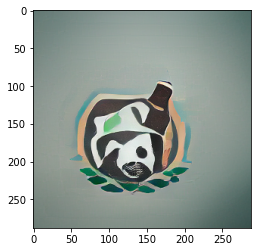

In [15]:
plt.imshow(image[:,:,::-1])

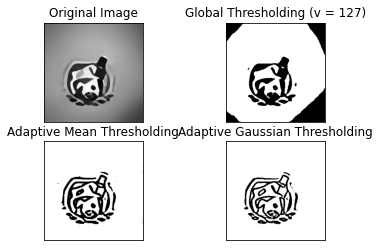

In [16]:
img=image.copy()

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv.medianBlur(img,7)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

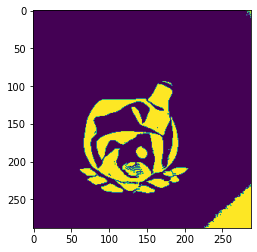

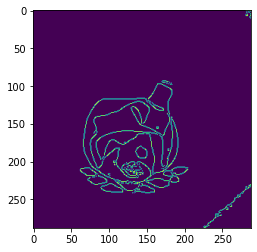

In [17]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv.medianBlur(img,3)
t=100
ret, thresh = cv2.threshold(gray,t,255,cv2.THRESH_BINARY_INV)
#ret,thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

# Canny Edge detection
canny = cv2.Canny(thresh, 0, t)
plt.imshow(canny)
plt.show()

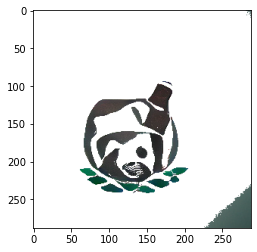

In [18]:
color_swapped=image.copy()
color_swapped[thresh<100]=255
plt.imshow(color_swapped[:,:,::-1])

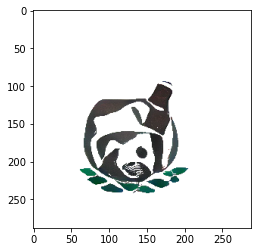

In [19]:
#Fix corners
color_swapped[225:,225:,]=255
color_swapped[:10,225:,]=255
plt.imshow(color_swapped[:,:,::-1])

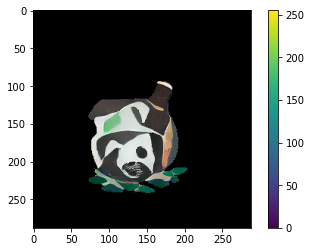

(<matplotlib.image.AxesImage at 0x16c4a3f7250>,
 None)

In [27]:
#Grabcut is another approach like the "fuzzy wand" select tool in GIMP. 
#Here's how to use it below, I'd recommend just using GIMP instead.
img=image.copy()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (73,50,225,290)#box surrounding our image
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img[:,:,::-1]),plt.colorbar(),plt.show()

In [28]:
cv.imwrite("media/panda logo color_swapped.png", color_swapped)

True

## Upsample

I found this tutorial to be excellent: https://learnopencv.com/super-resolution-in-opencv/ For our purposes, one image upsample, no speed concerns, we can use EDSR_x4

In [40]:
sr = cv.dnn_superres.DnnSuperResImpl_create()

path = "EDSR_x4.pb"

sr.readModel(path)

sr.setModel("edsr",4)

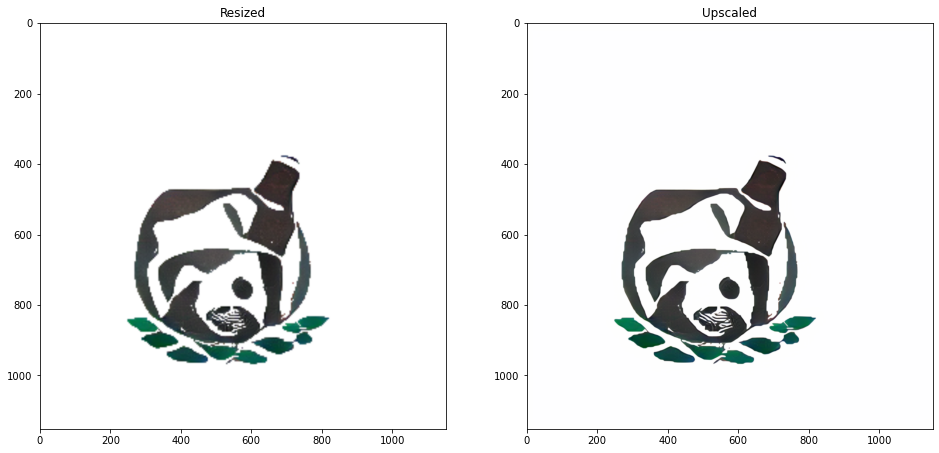

In [55]:


image=cv2.imread("media/panda logo color_swapped.png")
#image=cv2.imread("media/panda logo.png")

upscaled = sr.upsample(image)

# Resized image
resized = cv.resize(image,dsize=None,fx=4,fy=4)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
# OpenCV resized
plt.title("Resized")
plt.imshow(resized[:,:,::-1])

# SR upscaled
plt.subplot(1,2,2)
plt.imshow(upscaled[:,:,::-1])
plt.title("Upscaled")
plt.show()



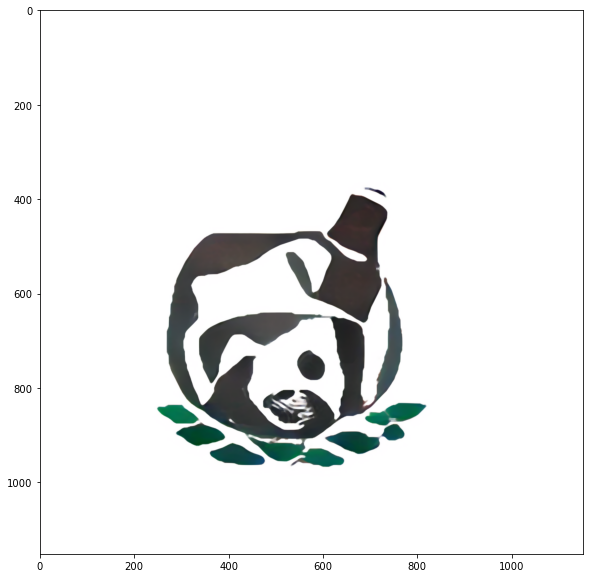

In [60]:
#Remove errant pixels using median blur
plt.figure(figsize=(16,10))
color_swapped_pixel_fixed=cv2.medianBlur(upscaled,7)
plt.imshow(color_swapped_pixel_fixed[:,:,::-1])

In [73]:
1162*1162

1350244

In [72]:
color_swapped_pixel_fixed[np.mean(color_swapped_pixel_fixed,axis=2)>250]=[]

(1186632, 3)

In [77]:
image_bgr=color_swapped_pixel_fixed.copy()
h, w, c = image_bgr.shape
# append Alpha channel -- required for BGRA (Blue, Green, Red, Alpha)
image_bgra = np.concatenate([image_bgr, np.full((h, w, 1), 255, dtype=np.uint8)], axis=-1)
# create a mask where white pixels ([255, 255, 255]) are True
white = np.any(image_bgr >= [250, 250, 250], axis=-1)
# change the values of Alpha to 0 for all the white pixels
image_bgra[white, -1] = 0
cv2.imwrite('media/image_bgra.png', image_bgra)

True

In [ ]:
#Add alpha channel

In [ ]:

cv2.imwrite("media/panda logo color_swapped upscaled.png", upscaled)

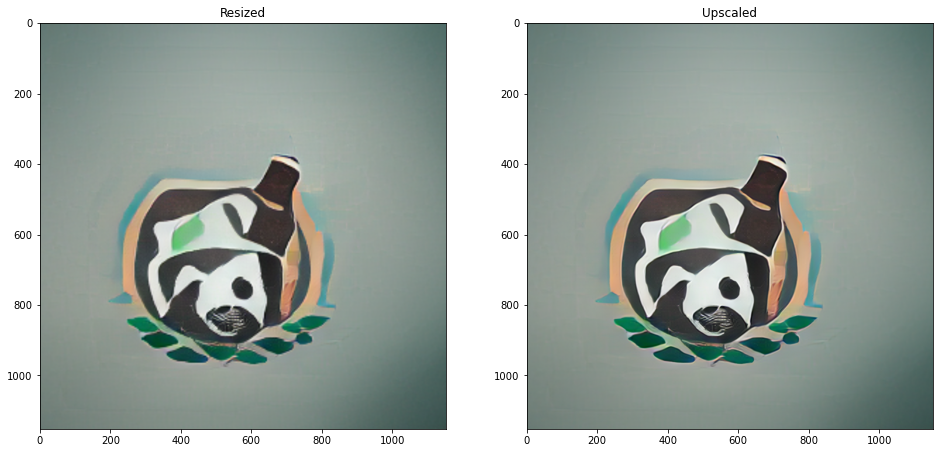

True

In [45]:
image=cv2.imread("media/panda logo.png")

upscaled = sr.upsample(image)

# Resized image
resized = cv.resize(image,dsize=None,fx=4,fy=4)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
# OpenCV resized
plt.title("Resized")
plt.imshow(resized[:,:,::-1])

# SR upscaled
plt.subplot(1,2,2)
plt.imshow(upscaled[:,:,::-1])
plt.title("Upscaled")
plt.show()
cv2.imwrite("media/panda logo upscaled.png", upscaled)

# Add to T-Shirt

https://www.rushordertees.com/design

# Thoughts on AI Images
AI does a great job at creating concepts but you'll likely still need some graphic designer to help touch up the images. Upsampling is pretty good with AI, removing the background is tougher. Use [GIMP](https://www.gimp.org/)  
  
If I was making this for a client I would create a UI like:  

